<a href="https://colab.research.google.com/github/AMMLRepos/titanic-dataset-death-prediction/blob/main/Logistic_Regression_Titanic_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Jovian Commit Essentials
# Please retain and execute this cell without modifying the contents for `jovian.commit` to work
!pip install jovian --upgrade -q
import jovian
jovian.set_project('logistic-regression-practice-titanic-dataset')
jovian.set_colab_id('1LtYXYyXdG48GJ_jQu-VaGOcj7ddV1Rnw')

# Logistic Regression on Titanic Dataset 

## About Titanic 
RMS Titanic was a British passenger liner operated by the White Star Line that sank in the North Atlantic Ocean on 15 April 1912, after striking an iceberg during her maiden voyage from Southampton to New York City. Of the estimated 2,224 passengers and crew aboard, more than 1,500 died, making the sinking at the time one of the deadliest of a single ship and the deadliest peacetime sinking of a superliner or cruise ship to date. With much public attention in the aftermath, the disaster has since been the material of many artistic works and a founding material of the disaster film genre.

## Objective of the project 
This activity rather than a project is for begginers to get a very basic excesice on performing Logistic Regression Classification algorithm to predict if a person would have survived the disaster. 

## Who should try this out ?
- A beginner in Data Science and Machine Learning 
- A beginner who started learning sklearn machine learning library of python
- Someone looking for a simple use case of applying machine learning on standard Titanic dataset
- Someone looking for a simple use case of applying machine learning using sklearn python library

## Acknowledgement 
This activity is followed based on the instructions provided on an udemy course named [Machine Learning Classification Bootcamp in Python](https://www.udemy.com/course/machine-learning-classification/)

In [ ]:
!pip install jovian --upgrade --quiet

In [ ]:
import jovian

In [ ]:
# Execute this to save new versions of the notebook
jovian.commit(project="logistic-regression-practice-titanic-dataset")

[jovian] Detected Colab notebook...
[jovian] Please enter your API key ( from https://jovian.ai/ ):
API KEY: ··········
[jovian] Uploading colab notebook to Jovian...
Committed successfully! https://jovian.ai/aaryaashay1848/logistic-regression-practice-titanic-dataset


'https://jovian.ai/aaryaashay1848/logistic-regression-practice-titanic-dataset'

# Downloading Titanic dataset 

Titanic dataset can be download from Kaggle using this [link](https://www.kaggle.com/soutarokirihara/data-science-day1-titanic)

We will use opendatasets library to download the Titanic dataset. Steps for the same are given below. One can also download the dataset manually from Kaggle and then upload it into Jupyter Notebook



In [ ]:
!pip install opendatasets

In [ ]:
import opendatasets as od

dataset_url = "https://www.kaggle.com/soutarokirihara/data-science-day1-titanic"
od.download(dataset_url)

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: aashaymaheshwari
Your Kaggle Key: ··········


100%|██████████| 22.0k/22.0k [00:00<00:00, 8.85MB/s]

In [ ]:
import os 
data_directory = "./data-science-day1-titanic"
os.listdir(data_directory)

['DSB_Day1_Titanic_train.csv']

# Understanding downloaded dataset

We need to understand the columns available in the dataset and what they mean. Let us list down the columns and their details - 

- **PassengerId** - A unique ID given to each passenger on the Titanic  
- **Survived** - Whether a passenger survived or not. 0 for not survived and 1 for survived 
- **PClass** - class of travel where 3 being lowest and 1 being highest 
- **Name**- Name of passenger 
- **Sex** - gender of passenger with male and female as values
- **Age** - age of passenger in years
- **SibSp** - # of parents / children aboard the Titanic
- **Parch** - # of parents / children aboard the Titanic
- **Ticket** - Ticket ID for tickets bought 
- **Fare** - Fare of the travel
- **Cabin** - Cabin if allocated to a specific person
- **Embarked** - Ports from where the passenger boarded the ship. Port of Embarkation C = Cherbourg, Q = Queenstown, S = Southampton

# Target Label - What are we predicting ?
- Survival of a passenger - survived = 0(not survived) or survived = 1(survived)

Based on the above information, we can conclude that PassengerId, Cabin, Name of Person, Embarked and Ticket columns should not have an impact on the model we develop and hence are not useful columns indeed. 

Let us know get started with steps to build our model. We have following major steps - 

- #Step 1 - Import required libraries and load the dataset 
- #Step 2 - Do basic visualization on the data to have a few basic questions answered 
- #Step 3 - Clean the data and split it into train and test dataset
- #Step 4 - Train the model 
- #Step 5 - Test the model 


# Step 1 - Import libraries
Assumping all required libraries are installed, import -
- pandas - basic operations on the data 
- numpy - basic operations on the data 
- seaborn - plotting graphs
- matplotlib - plotting graphs 

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

create a dataframe named "training_set" and load the csv file data. Use head function to see first 10 rows of dataframe

In [ ]:
training_set = pd.read_csv('./data-science-day1-titanic/DSB_Day1_Titanic_train.csv')
training_set.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [ ]:
jovian.commit()

[jovian] Detected Colab notebook...
[jovian] Uploading colab notebook to Jovian...
Committed successfully! https://jovian.ai/aaryaashay1848/logistic-regression-practice-titanic-dataset


'https://jovian.ai/aaryaashay1848/logistic-regression-practice-titanic-dataset'

See the last 10 records of the dataset 

In [ ]:
training_set.tail(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
881,882,0,3,"Markun, Mr. Johann",male,33.0,0,0,349257,7.8958,NaN,S
882,883,0,3,"Dahlberg, Miss. Gerda Ulrika",female,22.0,0,0,7552,10.5167,NaN,S
883,884,0,2,"Banfield, Mr. Frederick James",male,28.0,0,0,C.A./SOTON 34068,10.5000,NaN,S
884,885,0,3,"Sutehall, Mr. Henry Jr",male,25.0,0,0,SOTON/OQ 392076,7.0500,NaN,S
885,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,382652,29.1250,NaN,Q
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.7500,NaN,Q


Get basic information and statistics from the dataframe

In [ ]:
training_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


The above output gives us the following information - 
- There are 12 columns in the dataset
- There are maximum of 891 rows in the dataset 
- Age and Cabin have missing values 
- Embarked has 2 missing values 
- Dataset has int, float and object type of data 

In [ ]:
training_set.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


describe() function provides a few more mathematical details of the dataset. We can infer the following from the above output - 
- Average age of a person is 29.6 with max being 80 and min being 0.42(this does not make sense and is a value which will impact your analysis)
- Other columns being string type does not provide any significant output and can be ignored 

# Basic visualizatin of dataset
Let us plot some basic graphs to see patterns in our dataset for columns we think might impact the prediction

Let us get the count of survived and not survived passengers on Titanic

In [ ]:
survived_df = training_set[training_set['Survived'] == 1]
not_survived_df = training_set[training_set['Survived'] == 0]

print('Total number of records ', len(training_set))
print("Number of passengers survived ", len(survived_df))
print("Number of passengers who failed to survived ", len(not_survived_df))

Total number of records  891
Number of passengers survived  342
Number of passengers who failed to survived  549


The output show above shows that we have more records for people who failed to survive on Titanic and lesser for survived. 

Let us now print the % of survived and not survived passengers.

In [ ]:
print('Total percentage of passengers survived = ', (len(survived_df) / len(training_set)) * 100 , "%" )
print('Total percentage of passengers died = ', (len(not_survived_df) / len(training_set)) * 100 , "%" )

Total percentage of passengers survived =  38.38383838383838 %
Total percentage of passengers died =  61.61616161616161 %


The above output shows that 38% approx. of passengers survived the disaster and 61% approx. failed. This is important for us as we need to properly split our data into train and test in next steps so as to ensure that both our datasets have right proportion of survived vs not-survived passenger data. If we don't do that our model cannot be relied on as it might end up getting trained on more on any one of the category. We will see more of this in the step where we split our data and train our model

## Passengers belonging to each class of travel
The graph below shows that Titanic had almost double number of passengers who travelled in Class 3 (poorest of all) 

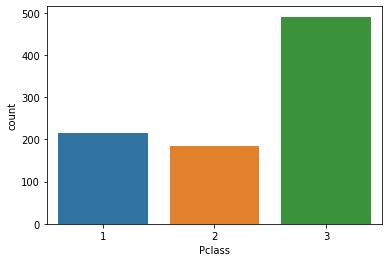

In [ ]:
sns.countplot(x = 'Pclass', data = training_set)

Let us now see how the class of travel impacts the survival on Titanic. We will plot a graph showing survival of each class of passenger. 

Based on the graph below we can observe that - 
- The survival rate was much higher for passengers who travelled in Class 1 (richest of all). We can see that more passengers travelling in Class 1 survived compared to not-survived 
- The survival rate for passengers travelling in Class 3 is completely opposite of Class 1. Many more travellers in Class 3 failed to survive and its almost double 
- The behavior in Class 2, i.e., the middle class remains same where passengers survived are almost equal to passengers who failed to survive 

We can safely say that passengers travelling in Class 1 are more likely to survive if the disaster happens again in same circumstances. Passengers in Class 3 are more unlikely to survive and might die as a result of this incident.  

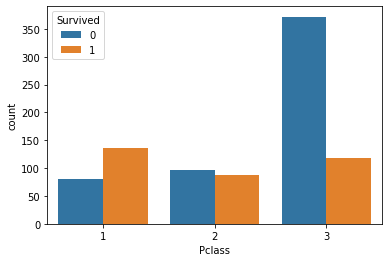

In [ ]:
sns.countplot(x = 'Pclass', hue = 'Survived', data = training_set)

Let us get the percentage of passengers who survived in the disaster based on Class

We will first get the count of passengers by Class and then check the percentage 

In [ ]:
total_class_1_passengers_df = training_set[training_set['Pclass'] == 1]
total_class_2_passengers_df = training_set[training_set['Pclass'] == 2]
total_class_3_passengers_df = training_set[training_set['Pclass'] == 3]

print("Total Passengers who travelled in Class 1 - ", len(total_class_1_passengers_df))
print("Total Passengers who travelled in Class 2 - ", len(total_class_2_passengers_df))
print("Total Passengers who travelled in Class 3 - ", len(total_class_3_passengers_df))

Total Passengers who travelled in Class 1 -  216
Total Passengers who travelled in Class 2 -  184
Total Passengers who travelled in Class 3 -  491


In [ ]:
total_survived_class_1_passengers = total_class_1_passengers_df[total_class_1_passengers_df['Survived'] == 1]
total_survived_class_2_passengers = total_class_2_passengers_df[total_class_2_passengers_df['Survived'] == 1]
total_survived_class_3_passengers = total_class_3_passengers_df[total_class_3_passengers_df['Survived'] == 1]


print("Total Passengers who travelled in Class 1 and survived - ", len(total_survived_class_1_passengers))
print("Total Passengers who travelled in Class 2 and survived - ", len(total_survived_class_2_passengers))
print("Total Passengers who travelled in Class 3 and survived - ", len(total_survived_class_3_passengers))

Total Passengers who travelled in Class 1 and survived -  136
Total Passengers who travelled in Class 2 and survived -  87
Total Passengers who travelled in Class 3 and survived -  119


In [ ]:
percent_survival_class_1 = len(total_survived_class_1_passengers) / len(total_class_1_passengers_df) * 100
percent_survival_class_2 = len(total_survived_class_2_passengers) / len(total_class_2_passengers_df) * 100
percent_survival_class_3 = len(total_survived_class_3_passengers) / len(total_class_3_passengers_df) * 100

print("Percentage of Survivors who travelled in Class 1 - ", percent_survival_class_1, "%")
print("Percentage of Survivors who travelled in Class 2 - ", percent_survival_class_2, "%")
print("Percentage of Survivors who travelled in Class 3 - ", percent_survival_class_3, "%")

Percentage of Survivors who travelled in Class 1 -  62.96296296296296 %
Percentage of Survivors who travelled in Class 2 -  47.28260869565217 %
Percentage of Survivors who travelled in Class 3 -  24.236252545824847 %


**The above outcome clearly indicates that only 24% of passengers who travelled in Class 3 survived the disaster compared to 63% of passengers who travelled in Class 1**

Let us now see that how many passengers had siblings boarded to Titanic and how they performed in terms of survival. We will plot a graph for both as given -

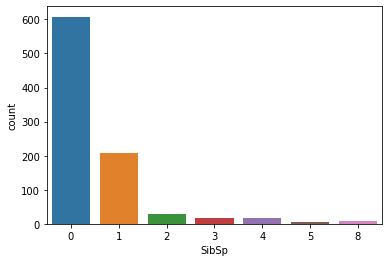

In [ ]:
sns.countplot(x = "SibSp", data = training_set)

The graph given above clearly indicated that a huge number (almost 80%) of passengers had 0 siblings on-boarded to Titanic 

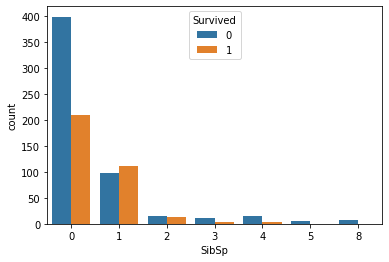

In [ ]:
sns.countplot(x = "SibSp", hue = "Survived", data = training_set)

The above graph indicates that passengers having 1 sibling with them did better and survived the disaster compared to passengers who had no siblings onboarded. In next few cells, we will try the same for Parch column too and will find a similiar trend

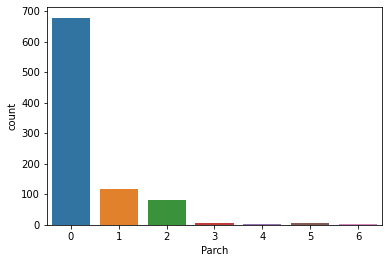

In [ ]:
sns.countplot(x = 'Parch', data = training_set)

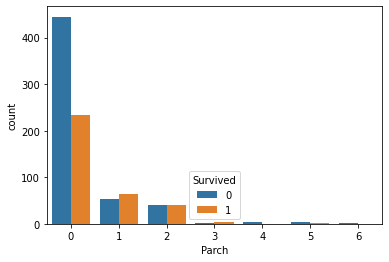

In [ ]:
sns.countplot(x = 'Parch', hue = "Survived", data = training_set)

## Count of passenges on-boarded from various cities/ports 
Let us know see how the graph on how many passengers boarded Titanic from various ports marked in the dataset. 

From the graph given below, it is clealy indicated that Southampton onboarded almost 80 % of total passengers. This being the fact, we might also get most number of deaths from the city too.

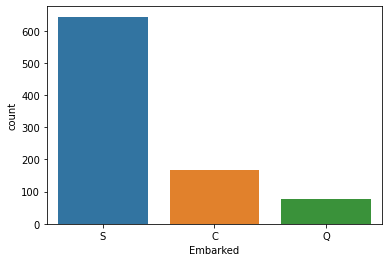

In [ ]:
sns.countplot(x = 'Embarked', data = training_set)

**As assumed, most number of passengers who onboarded from Southampton, almost 400+ passengers failed to survive the disaster. While location could be an incident, we cannot deny the fact that Class 3 passengers being the maxium among failing to survive, most of them came from Southampton**

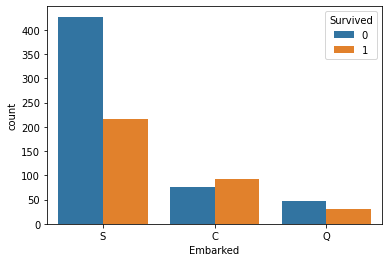

In [ ]:
sns.countplot(x = 'Embarked', hue = 'Survived', data = training_set)

Let us now try to get the following - 
- How many males and females where travelling in Titanic ?
- How many males and females survived the accident ?
- What was the percentage of survival for male and female ?
- What was the percentage of males and females based on the class of travel ?


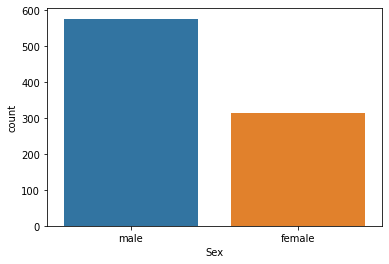

In [ ]:
sns.countplot(x = 'Sex', data = training_set)

## How many males and females where travelling in Titanic ?


In [ ]:
males_count = training_set[training_set['Sex'] == 'male']
females_count = training_set[training_set['Sex'] == 'female']

print("Number of males - ", len(males_count))

print("Number of Females - ", len(females_count))

Number of males -  577
Number of Females -  314


## How many males and females survived the accident ?

In [ ]:
survived_males_count = training_set.loc[(training_set['Sex'] == 'male') & (training_set['Survived'] == 1)]
survived_females_count = training_set.loc[(training_set['Sex'] == 'female') & (training_set['Survived'] == 1)]


print("Numbes of males who survived - ", len(survived_males_count))
print("Number of females who survived - ", len(survived_females_count))

Numbes of males who survived -  109
Number of females who survived -  233


## What was the percentage of survival for male and female ?

In [ ]:
percentage_of_males_survived =  len(survived_males_count) / len(males_count) * 100
percentage_of_females_survived = len(survived_females_count) / len(females_count)  * 100

print("Percentage of males survived - ", percentage_of_males_survived)
print("Percentage of females survived - ", percentage_of_females_survived)

Percentage of males survived -  18.890814558058924
Percentage of females survived -  74.20382165605095


## What was the percentage of males and females based on the class of travel ?

In [ ]:
males_class_1 = training_set.loc[(training_set['Sex'] == 'male') & (training_set['Pclass'] == 1)].count()['Pclass']
males_class_2 = training_set.loc[(training_set['Sex'] == 'male') & (training_set['Pclass'] == 2)].count()['Pclass']
males_class_3 = training_set.loc[(training_set['Sex'] == 'male') & (training_set['Pclass'] == 3)].count()['Pclass']


females_class_1 = training_set.loc[(training_set['Sex'] == 'female') & (training_set['Pclass'] == 1)].count()['Pclass']
females_class_2 = training_set.loc[(training_set['Sex'] == 'female') & (training_set['Pclass'] == 2)].count()['Pclass']
females_class_3 = training_set.loc[(training_set['Sex'] == 'female') & (training_set['Pclass'] == 3)].count()['Pclass']


print("Percentage of males travelling in Class 1 - ", (males_class_1 / len(males_count)* 100))
print("Percentage of males travelling in Class 2 - ", (males_class_2 / len(males_count)* 100) )
print("Percentage of males travelling in Class 3 - ", (males_class_3 / len(males_count)* 100))

print("Percentage of females travelling in Class 1 - ", (females_class_1 / len(females_count)* 100))
print("Percentage of females travelling in Class 2 - ", (females_class_2 / len(females_count)* 100))
print("Percentage of females travelling in Class 3 - ", (females_class_3 / len(females_count)* 100))
jovian.commit()

Percentage of males travelling in Class 1 -  21.143847487001732
Percentage of males travelling in Class 2 -  18.717504332755635
Percentage of males travelling in Class 3 -  60.13864818024264
Percentage of females travelling in Class 1 -  29.936305732484076
Percentage of females travelling in Class 2 -  24.203821656050955
Percentage of females travelling in Class 3 -  45.85987261146497
[jovian] Detected Colab notebook...
[jovian] Uploading colab notebook to Jovian...
Committed successfully! https://jovian.ai/aaryaashay1848/logistic-regression-practice-titanic-dataset


'https://jovian.ai/aaryaashay1848/logistic-regression-practice-titanic-dataset'

The below graph indicates that "Females" were given priority for life saving activities and hence almost double females survived compared to not survived females 

Other two graphs on age and fare are plotted but are not signifying anything critical 

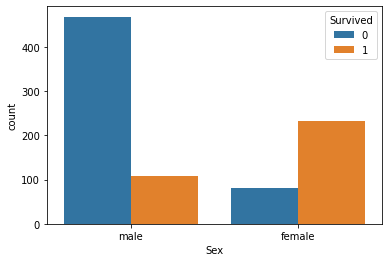

In [ ]:
sns.countplot(x = 'Sex', hue = "Survived", data = training_set)

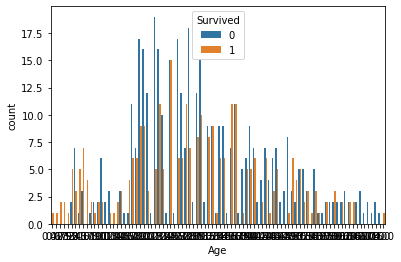

In [ ]:
sns.countplot(x = 'Age', hue = "Survived", data = training_set)

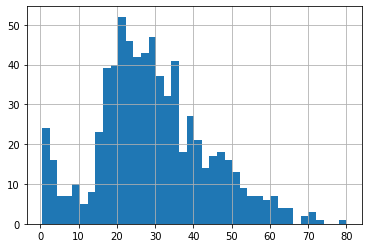

In [ ]:
training_set['Age'].hist(bins = 40)

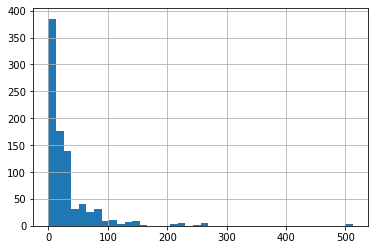

In [ ]:
training_set['Fare'].hist(bins = 40)

In [ ]:
jovian.commit()

[jovian] Detected Colab notebook...
[jovian] Uploading colab notebook to Jovian...
Committed successfully! https://jovian.ai/aaryaashay1848/logistic-regression-practice-titanic-dataset


'https://jovian.ai/aaryaashay1848/logistic-regression-practice-titanic-dataset'

# Step 3 - Cleaning data - prepare the data for training

In [ ]:
training_set 

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


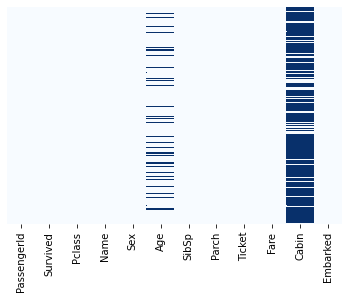

In [ ]:
sns.heatmap(training_set.isnull(), yticklabels = False, cbar = False, cmap= 'Blues')

In [ ]:
training_set

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [ ]:

training_set.drop(['Ticket', 'PassengerId', 'Name', 'Cabin'], axis = 1, inplace = True)

In [ ]:
training_set

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S
887,1,1,female,19.0,0,0,30.0000,S
888,0,3,female,NaN,1,2,23.4500,S
889,1,1,male,26.0,0,0,30.0000,C


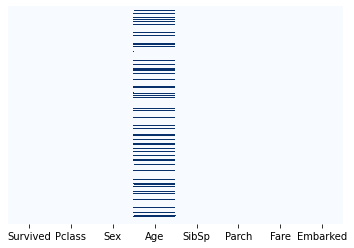

In [ ]:
sns.heatmap(training_set.isnull(), yticklabels = False, cbar = False, cmap = 'Blues')

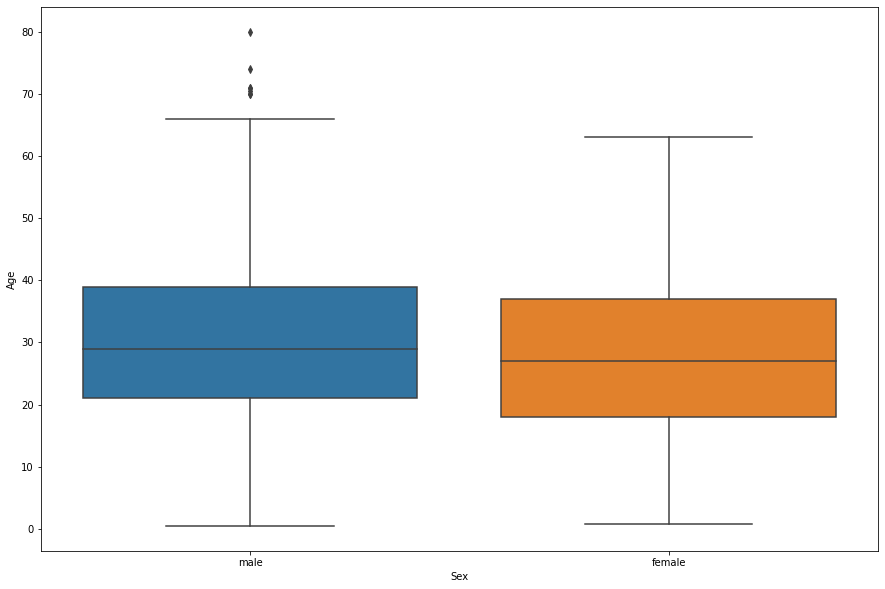

In [ ]:
plt.figure(figsize = (15,10))
sns.boxplot(x = 'Sex', y = 'Age', data = training_set)

In [ ]:
def fill_Age(data):
  age = data[0]
  sex = data[1]

  if pd.isnull(age):
    if sex is 'male':
      return 29
    else:
      return 25
  else:
    return age
  

In [ ]:
training_set ['Age'] = training_set[['Age', 'Sex']].apply(fill_Age, axis = 1)

In [ ]:
training_set

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S
887,1,1,female,19.0,0,0,30.0000,S
888,0,3,female,25.0,1,2,23.4500,S
889,1,1,male,26.0,0,0,30.0000,C


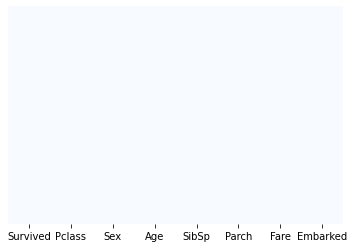

In [ ]:
sns.heatmap(training_set.isnull(), yticklabels = False, cbar = False, cmap = 'Blues')

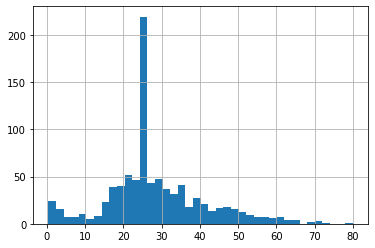

In [ ]:
training_set['Age'].hist(bins = 40)

In [ ]:
male = pd.get_dummies(training_set['Sex'])

In [ ]:
male = pd.get_dummies(training_set['Sex'], drop_first = True)
male

,male
0,1
1,0
2,0
3,0
4,1
...,...
886,1
887,0
888,0
889,1


In [ ]:
training_set.drop('Sex', axis = 1, inplace = True)

In [ ]:
training_set

,Survived,Pclass,Age,SibSp,Parch,Fare,Embarked
0,0,3,22.0,1,0,7.2500,S
1,1,1,38.0,1,0,71.2833,C
2,1,3,26.0,0,0,7.9250,S
3,1,1,35.0,1,0,53.1000,S
4,0,3,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...
886,0,2,27.0,0,0,13.0000,S
887,1,1,19.0,0,0,30.0000,S
888,0,3,25.0,1,2,23.4500,S
889,1,1,26.0,0,0,30.0000,C


In [ ]:
training_set = pd.concat([training_set, male], axis = 1)

In [ ]:
training_set

,Survived,Pclass,Age,SibSp,Parch,Fare,Embarked,male
0,0,3,22.0,1,0,7.2500,S,1
1,1,1,38.0,1,0,71.2833,C,0
2,1,3,26.0,0,0,7.9250,S,0
3,1,1,35.0,1,0,53.1000,S,0
4,0,3,35.0,0,0,8.0500,S,1
...,...,...,...,...,...,...,...,...
886,0,2,27.0,0,0,13.0000,S,1
887,1,1,19.0,0,0,30.0000,S,0
888,0,3,25.0,1,2,23.4500,S,0
889,1,1,26.0,0,0,30.0000,C,1


In [ ]:
# Input
X = training_set.drop(['Survived', 'Embarked'], axis = 1).values

In [ ]:
X

array([[ 3.    , 22.    ,  1.    ,  0.    ,  7.25  ,  1.    ],
       [ 1.    , 38.    ,  1.    ,  0.    , 71.2833,  0.    ],
       [ 3.    , 26.    ,  0.    ,  0.    ,  7.925 ,  0.    ],
       ...,
       [ 3.    , 25.    ,  1.    ,  2.    , 23.45  ,  0.    ],
       [ 1.    , 26.    ,  0.    ,  0.    , 30.    ,  1.    ],
       [ 3.    , 32.    ,  0.    ,  0.    ,  7.75  ,  1.    ]])

In [ ]:
Y = training_set['Survived'].values

In [ ]:
Y

array([0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1,
       1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1,

In [ ]:
jovian.commit()

[jovian] Detected Colab notebook...
[jovian] Uploading colab notebook to Jovian...
Committed successfully! https://jovian.ai/aaryaashay1848/logistic-regression-practice-titanic-dataset


'https://jovian.ai/aaryaashay1848/logistic-regression-practice-titanic-dataset'

# Step 4 - Model Training 

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 10 )

In [ ]:
len(X_train)
X_train

array([[  3.    ,  28.5   ,   0.    ,   0.    ,   7.2292,   1.    ],
       [  2.    ,  27.    ,   0.    ,   0.    ,  10.5   ,   0.    ],
       [  3.    ,  25.    ,   1.    ,   0.    ,  16.1   ,   0.    ],
       ...,
       [  1.    ,  25.    ,   0.    ,   0.    , 221.7792,   1.    ],
       [  3.    ,  12.    ,   1.    ,   0.    ,  11.2417,   1.    ],
       [  2.    ,  36.    ,   0.    ,   0.    ,  10.5   ,   1.    ]])

In [ ]:
len(X_test)

179

In [ ]:
len(Y_train)
Y_train

array([0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0,
       1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0,
       0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1,
       1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1,
       1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,

In [ ]:
len(Y_test)

179

In [ ]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, Y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
jovian.commit()

[jovian] Detected Colab notebook...
[jovian] Uploading colab notebook to Jovian...
Committed successfully! https://jovian.ai/aaryaashay1848/logistic-regression-practice-titanic-dataset


'https://jovian.ai/aaryaashay1848/logistic-regression-practice-titanic-dataset'

# Step 5 - Model Testing

In [ ]:
y_predict = classifier.predict(X_test)

In [ ]:
y_predict

array([0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1,
       0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0,
       1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 1])

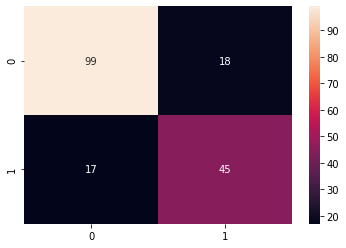

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test, y_predict)
sns.heatmap(cm, annot = True, fmt = 'd')

In [ ]:
jovian.commit()

[jovian] Detected Colab notebook...
[jovian] Uploading colab notebook to Jovian...
Committed successfully! https://jovian.ai/aaryaashay1848/logistic-regression-practice-titanic-dataset


'https://jovian.ai/aaryaashay1848/logistic-regression-practice-titanic-dataset'

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(Y_test, y_predict))

              precision    recall  f1-score   support

           0       0.85      0.85      0.85       117
           1       0.71      0.73      0.72        62

    accuracy                           0.80       179
   macro avg       0.78      0.79      0.78       179
weighted avg       0.81      0.80      0.80       179



In [ ]:
jovian.commit()

[jovian] Detected Colab notebook...
[jovian] Uploading colab notebook to Jovian...
Committed successfully! https://jovian.ai/aaryaashay1848/logistic-regression-practice-titanic-dataset


'https://jovian.ai/aaryaashay1848/logistic-regression-practice-titanic-dataset'

In [ ]:
test_frame = pd.read_csv('./Test_Titanic.csv')

FileNotFoundError: ignored